===========iteration:0===========
SGD:2.3914416654401345
Momentum:2.4565523690147177
AdaGrad:2.0098601880299674
Adam:2.1689124531448685
===========iteration:100===========
SGD:1.4213760944225455
Momentum:0.2961514628066888
AdaGrad:0.15150433178027486
Adam:0.25622413132195837
===========iteration:200===========
SGD:0.6623585255251615
Momentum:0.17165431942294893
AdaGrad:0.07690880464590048
Adam:0.12545445981474881
===========iteration:300===========
SGD:0.41484090703177884
Momentum:0.17726744912624084
AdaGrad:0.08936778140831211
Adam:0.11898641350419512
===========iteration:400===========
SGD:0.322935841329227
Momentum:0.1472441502017875
AdaGrad:0.056187672790836016
Adam:0.07257473079603657
===========iteration:500===========
SGD:0.35433561177432177
Momentum:0.2211406050998349
AdaGrad:0.05950466698286909
Adam:0.09696713309083985
===========iteration:600===========
SGD:0.3360087071454693
Momentum:0.11502170724354176
AdaGrad:0.05057660453126604
Adam:0.06877369266189523
===========iteratio

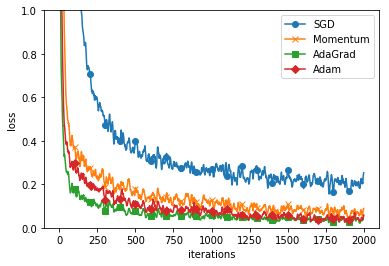

In [3]:

import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
